In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import random 
import copy
from itertools import compress
from itertools import groupby
import scipy.optimize as opt
import time

In [2]:
def bounded_self_assembly_opposite_sep_of_timescales_limit(t,z,params):
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

#     z[z <0] =0 #impose non-negativity
    k, p = z
    
    dkdt = -eta * k**(n+1) / kdk + (ktot - k - n * k**n / kdk) * (p**m / kdp + ptilde)
    dpdt = -eta * k**n * p / kdk + (ptot - p - m * p**m / kdp) * (p**m / kdp + ptilde)
        
    dzdt = [dkdt, dpdt]    
    return dzdt

In [3]:
def bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,plotLog = False):
    odeSol = scipy.integrate.solve_ivp(lambda tSpan, z: bounded_self_assembly_opposite_sep_of_timescales_limit(tSpan, z, params),
                                        tSpan,initialConditions,method = 'Radau', vectorized=False,
#                                        jac = lambda tSpan,z: lockRatorsInhibitingKinase_DirectFromClosed_Jac(tSpan,z,params)
                                      )
    z = np.transpose(odeSol.y)
    t = odeSol.t
    
    bounded_self_assembly_opposite_sep_of_timescales_limit_plotFxn(z,t,toPlot,plotLog,params)
    return z,t

In [4]:
def bounded_self_assembly_opposite_sep_of_timescales_limit_plotFxn(z,t,toPlot,plotLog,params):
    if toPlot or plotLog:
        k = z[:,0]
        p = z[:,1]
                
        n, m, eta, kdk, kdp, ktot, ptot, ptilde = params
        
        # plot results
        plt.plot(t,k,'b',label='k')
        plt.plot(t,p,'r',label='p')

        plt.ylabel('values')
        plt.xlabel('time')
        if plotLog:
            plt.yscale('log')
 
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),fontsize = 12)
        #plt.ylim(top=AaTot)
        plt.show()

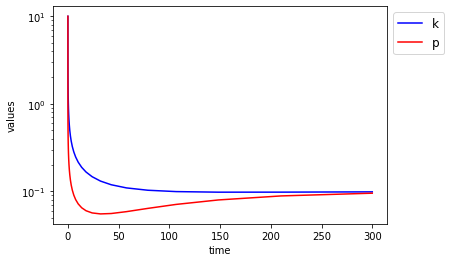

max(abs(dzdt)) = 4.5989681216168296e-05


In [5]:
#kbkio > kbkic
#kukic >= kukio
n = 2 
m = 5 
eta = (3.1/14) / (2e3 / 1e4)
kdk = 1 
kdp = 1 
ktot = 10 
ptot = 10 
ptilde = 1e-4

params = [n, m, eta, kdk, kdp, ktot, ptot, ptilde]
initialConditions = [ktot, ptot]


tmax = 300 #maximum time we'll integrate to
tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

toPlot = True

z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
k = z[:,0]
p = z[:,1]

dzdt = bounded_self_assembly_opposite_sep_of_timescales_limit(t[-1],z[-1,:],params)
print('max(abs(dzdt)) = ' + str(max(np.abs(dzdt))))


# print('kMKo = ' + str((kuko + kcko)/kbko) + '; kMKc = ' + str((kukc + kckc)/kbkc))
# print('kMPo = ' + str((kupo + kcpo)/kbpo) + '; kMPc = ' + str((kupc + kcpc)/kbpc))
# print('kcK = ' + str(kcko) + '; kcP = ' + str(kcpo))
# print('kDKo = ' + str(kukio/kbkio) + '; kDKc = ' + str(kukic/kbkic))

i = 0 and time elapsed = 0.0006351470947265625
i = 10000 and time elapsed = 407.86348700523376


/Users/Ofer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
/Users/Ofer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/Users/Ofer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in double_scalars


i = 20000 and time elapsed = 814.3929741382599
i = 30000 and time elapsed = 1183.1468181610107


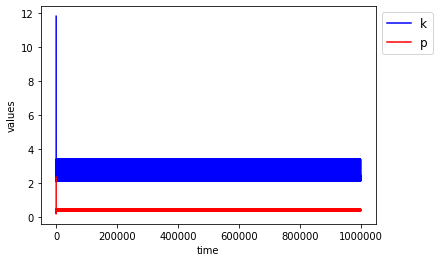

[2, 20, 1.1071428571428572, 114.05102993149755, 2.54720791045946e-05, 11.829585362463549, 2.3687064156620723, 0.009124818204314005]
[11.829585362463549, 2.3687064156620723]
[0, 1000000]
23048
time taken for this parameter set = 209.5994701385498
i = 40000 and time elapsed = 2011.7658910751343
i = 50000 and time elapsed = 2393.2587671279907


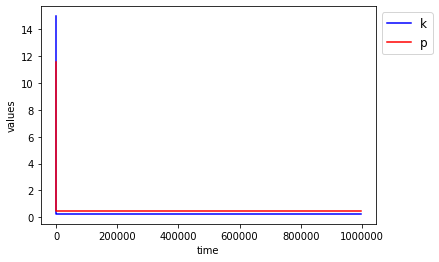

[2, 6, 1.1071428571428572, 0.009272643385807211, 0.008571340818929782, 14.966547557488632, 11.546305137162394, 0.001989072391040953]
[14.966547557488632, 11.546305137162394]
[0, 1000000]
11
time taken for this parameter set = 0.1770627498626709
i = 60000 and time elapsed = 2672.7882990837097


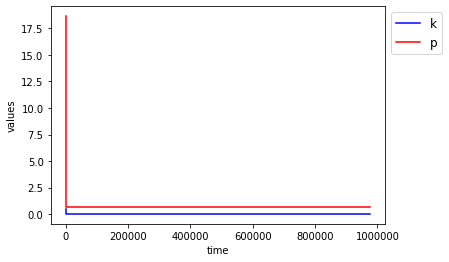

[2, 12, 1.1071428571428572, 0.001370543968553505, 0.0075541934315442654, 0.4891603033211867, 18.64327353434738, 1.1654709030323475e-06]
[0.4891603033211867, 18.64327353434738]
[0, 1000000]
16
time taken for this parameter set = 0.23468494415283203


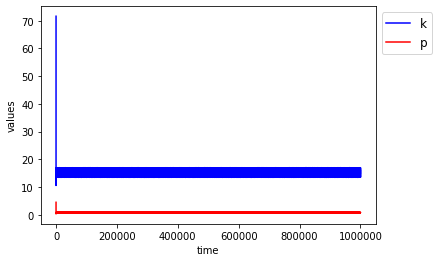

[2, 11, 1.1071428571428572, 722.44041771051, 1.164557535263436, 71.6102784418079, 4.511051635425719, 0.02852896652121866]
[71.6102784418079, 4.511051635425719]
[0, 1000000]
208247
time taken for this parameter set = 614.461051940918
i = 70000 and time elapsed = 4165.272358179092
i = 80000 and time elapsed = 4444.4189331531525
i = 90000 and time elapsed = 4734.891765117645
i = 100000 and time elapsed = 5024.189848184586
i = 110000 and time elapsed = 5310.459289073944


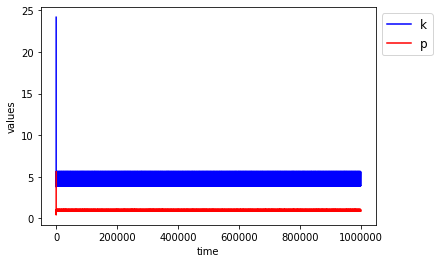

[2, 17, 1.1071428571428572, 89.08607573004193, 22.67105038699352, 24.182757297809562, 5.604404462915246, 0.032597485394630824]
[24.182757297809562, 5.604404462915246]
[0, 1000000]
92550
time taken for this parameter set = 391.6259460449219


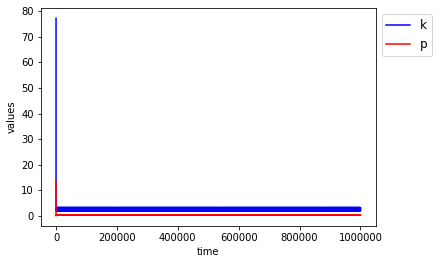

[2, 12, 1.1071428571428572, 1.4347345693981648, 0.0008709059705916473, 77.24505160212118, 13.651005348789214, 0.09272058651862732]
[77.24505160212118, 13.651005348789214]
[0, 1000000]
644874
time taken for this parameter set = 3717.6454768180847
i = 120000 and time elapsed = 13893.639193058014
i = 130000 and time elapsed = 14162.14593911171
i = 140000 and time elapsed = 14440.335950136185
i = 150000 and time elapsed = 14854.842584133148
i = 160000 and time elapsed = 15269.885731220245
i = 170000 and time elapsed = 15562.450720071793
i = 180000 and time elapsed = 15833.54174900055
i = 190000 and time elapsed = 16101.954587221146
i = 200000 and time elapsed = 16362.090413093567
i = 210000 and time elapsed = 16628.102166175842
i = 220000 and time elapsed = 16897.64160013199
i = 230000 and time elapsed = 17165.710078954697
i = 240000 and time elapsed = 17429.73930501938
i = 250000 and time elapsed = 17697.909378051758
i = 260000 and time elapsed = 17962.834429979324
i = 270000 and time ela

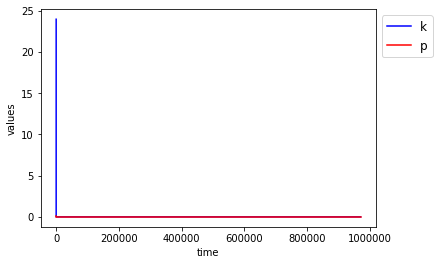

[2, 6, 1.1071428571428572, 2.1277677118255373e-05, 0.0004247739043719401, 23.979073187592114, 0.07639372950274094, 0.0004659095870922617]
[23.979073187592114, 0.07639372950274094]
[0, 1000000]
11
time taken for this parameter set = 0.17220711708068848
i = 570000 and time elapsed = 25878.815069913864


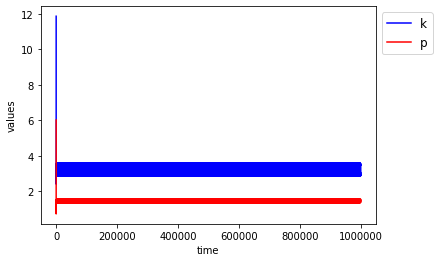

[2, 12, 1.1071428571428572, 44.90431099723136, 1593.2316330458398, 11.869934139643911, 6.023856986332109, 0.036184080012432715]
[11.869934139643911, 6.023856986332109]
[0, 1000000]
113675
time taken for this parameter set = 250.46510410308838
i = 580000 and time elapsed = 26621.267461061478
i = 590000 and time elapsed = 26869.64013528824
i = 600000 and time elapsed = 27121.252469062805
i = 610000 and time elapsed = 27373.137570142746
i = 620000 and time elapsed = 27620.73755311966
i = 630000 and time elapsed = 27863.43266892433


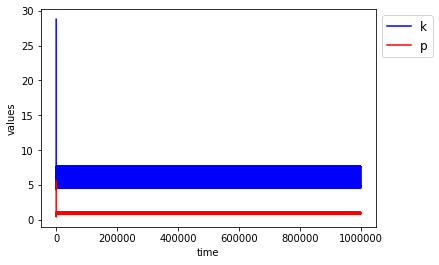

[2, 13, 1.1071428571428572, 146.61292509624587, 17.074667502942933, 28.776442267467107, 5.496196907028661, 0.02391060753815431]
[28.776442267467107, 5.496196907028661]
[0, 1000000]
79502
time taken for this parameter set = 348.3707571029663
i = 640000 and time elapsed = 31670.490378141403
i = 650000 and time elapsed = 31937.194800138474


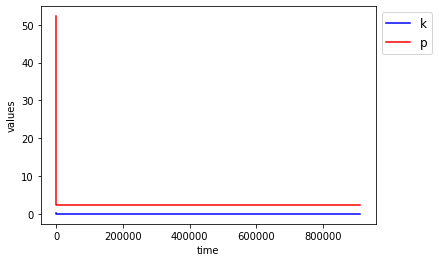

[2, 7, 1.1071428571428572, 2.2817064215205563e-05, 65.76684611070928, 0.11308522747567099, 52.24446546095197, 3.627084136444045e-05]
[0.11308522747567099, 52.24446546095197]
[0, 1000000]
13
time taken for this parameter set = 0.18944311141967773
i = 660000 and time elapsed = 32202.93514919281
i = 670000 and time elapsed = 32454.027207136154
i = 680000 and time elapsed = 32697.70953297615
i = 690000 and time elapsed = 32945.254996061325
i = 700000 and time elapsed = 33193.25387811661
i = 710000 and time elapsed = 33440.63601613045
i = 720000 and time elapsed = 33683.422240018845
i = 730000 and time elapsed = 33931.75543498993
i = 740000 and time elapsed = 34177.23309111595
i = 750000 and time elapsed = 34421.919045209885


/Users/Ofer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


i = 760000 and time elapsed = 34677.78004193306
i = 770000 and time elapsed = 34920.413053035736
i = 780000 and time elapsed = 35164.65830922127


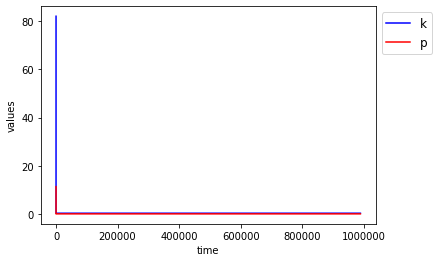

[2, 5, 1.1071428571428572, 0.01717376358386607, 9.596457137386821e-05, 82.04799829053434, 11.341000923271656, 0.024357769130191144]
[82.04799829053434, 11.341000923271656]
[0, 1000000]
13
time taken for this parameter set = 0.18117976188659668
i = 790000 and time elapsed = 35413.90968608856
i = 800000 and time elapsed = 35659.0769340992
i = 810000 and time elapsed = 35907.049680233
i = 820000 and time elapsed = 36149.309823036194
i = 830000 and time elapsed = 36395.024712085724
i = 840000 and time elapsed = 36644.84578514099
i = 850000 and time elapsed = 36894.82550096512
i = 860000 and time elapsed = 37144.62076711655
i = 870000 and time elapsed = 37396.613681316376
i = 880000 and time elapsed = 37644.858993291855
i = 890000 and time elapsed = 37894.95468425751
i = 900000 and time elapsed = 38142.66680812836
i = 910000 and time elapsed = 38389.09815597534
i = 920000 and time elapsed = 38642.6391351223
i = 930000 and time elapsed = 38891.72683906555
i = 940000 and time elapsed = 39138.

In [6]:
newParams3 = []
params_tested3 = []
start = time.time()

maxConc = float(100)
minConc = 1e-4  #not set experimentally
maxKd = 1e5
minKd = 1e-5

n = 2
eta = (3.1/14) / (2e3 / 1e4)

for i in range(1000000):
    if i % 10000 == 0:
        print('i = ' + str(i) +' and time elapsed = ' + str(time.time()-start))
    
    m = np.random.randint(5, 21)
    
    kdk = np.exp(random.random() * (np.log(maxKd)-np.log(minKd)) + np.log(minKd))
    kdp = np.exp(random.random() * (np.log(maxKd)-np.log(minKd)) + np.log(minKd))
    
    ktot = np.exp(random.random() * (np.log(maxConc)-np.log(minConc)) + np.log(minConc))
    ptot = np.exp(random.random() * (np.log(maxConc)-np.log(minConc)) + np.log(minConc))
    ptilde = np.exp(random.random() * (np.log(ptot / (10*m)) - np.log(minConc/ (10 * m))) + np.log(minConc / (10*m)))
    

    params = [n, m, eta, kdk, kdp, ktot, ptot, ptilde]
    initialConditions = [ktot, ptot]
    
    #maximum time we'll integrate to
    tmax = 1000000  # ran 100 parameter sets for 1/10 this long and found they all reached steady state in time.
    tSpan = [0,tmax]
    toPlot = False

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot)
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])
#     eps = 0.001
#     nonNegDAodt = abs(dAodt)>eps
#     nonNegDAodtIndex = list(compress(range(len(nonNegDAodt)), nonNegDAodt))
#     nIP = len([x[0] for x in groupby(np.sign(dAodt[:nonNegDAodtIndex[-1]]))]) #number of inflection points

#     if nonNegDAodtIndex[-1]>len(t)/1.1 and nIP > 20:

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)
    nIP = len(uniquekeys)

    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()): 
        #all params found had nIP>25 for tMax at 30/min(params), t[-3]/t[-2]>0.997 
        #the second-to-last and is to make sure the oscillations aren't decaying while the second is to make sure there are real oscillations
        #the last and is to make sure the integration actually worked
        startPlot = time.time()
        z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(
            [0,t[max(prevCounter, 1)]],params,initialConditions,True)
        print(params)
        print(initialConditions)
        print(tSpan)
        print(nIP)
        #print(xChange)
        #print(t)
        print('time taken for this parameter set = ' + str(time.time()-startPlot))
        newParams3.append(params)
    else:
        params_tested3.append(params)
timeElapsed = time.time()-start
print('timeElapsed = ' + str(timeElapsed))

In [20]:
# Using tmax = 100000, 2e6 parameters
osc_params = [[2, 14, 1.1, 41.5, 201, 36.1, 9.23, 0.0591],
              [2, 12, 1.1, 68.8, 0.0235, 42.8, 4.80, 0.0309],
              [2, 17, 1.1, 979, 11800, 58.7, 6.94, 0.0322],
              [2, 15, 1.1, 399, 0.00540, 56.7, 3.82, 0.0193],
              [2, 9, 1.1, 124, 5.15, 96.3, 9.11, 0.0391],
              [2, 10, 1.1071428571428572, 21.612683762935333, 3.889708457624485e-05, 50.472341931940235, 3.747585293038423, 0.029175756688183153],
              [2, 10, 1.1071428571428572, 1092.2862036264328, 2.6005643414218456e-05, 49.89640487511141, 1.3740259334688867, 0.007100576953147201],
              [2, 20, 1.1071428571428572, 26.372619735445582, 0.4336040506302735, 56.479550459141905, 10.619496215724647, 0.051563509861511994],
              [2, 14, 1.1071428571428572, 626.3936945941867, 0.0004992271074233355, 32.699018530813454, 2.202799590632929, 0.01043696917518663],
              [2, 9, 1.1071428571428572, 36.55130425114768, 0.0030803214412359883, 85.64769213053383, 5.923545222097053, 0.03154579262814242]]

# Using tmax = 1000000, 1e6 parameters
osc_params += [[2, 20, 1.1071428571428572, 114.05102993149755, 2.54720791045946e-05, 11.829585362463549, 2.3687064156620723, 0.009124818204314005],
              [2, 11, 1.1071428571428572, 722.44041771051, 1.164557535263436, 71.6102784418079, 4.511051635425719, 0.02852896652121866],
              [2, 17, 1.1071428571428572, 89.08607573004193, 22.67105038699352, 24.182757297809562, 5.604404462915246, 0.032597485394630824],
              [2, 12, 1.1071428571428572, 1.4347345693981648, 0.0008709059705916473, 77.24505160212118, 13.651005348789214, 0.09272058651862732],
              [2, 12, 1.1071428571428572, 44.90431099723136, 1593.2316330458398, 11.869934139643911, 6.023856986332109, 0.036184080012432715],
              [2, 13, 1.1071428571428572, 146.61292509624587, 17.074667502942933, 28.776442267467107, 5.496196907028661, 0.02391060753815431]]

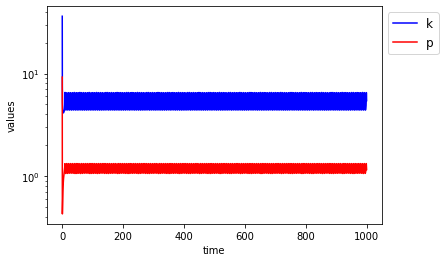

period = 6.1756634793832745


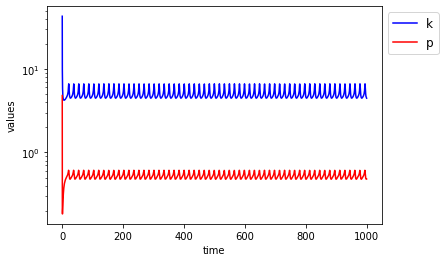

period = 16.107581146882126


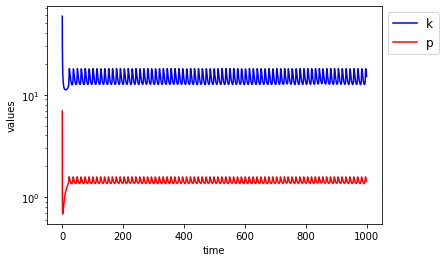

period = 12.9848793974528


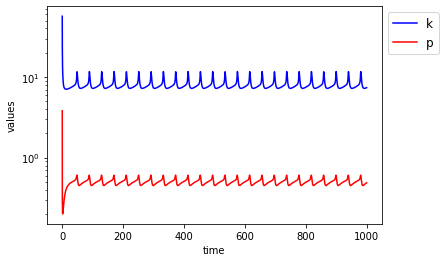

period = 40.375889919745646


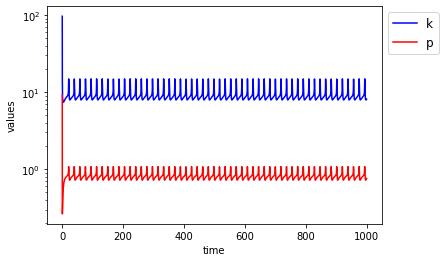

period = 18.179845965834147


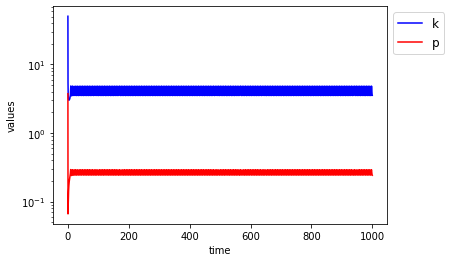

period = 5.499846978626579


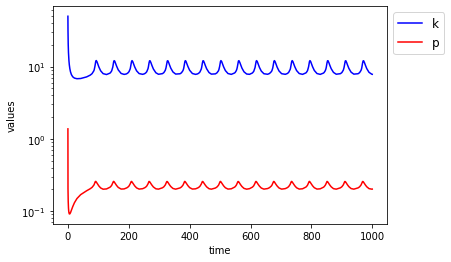

period = 57.701942898014636


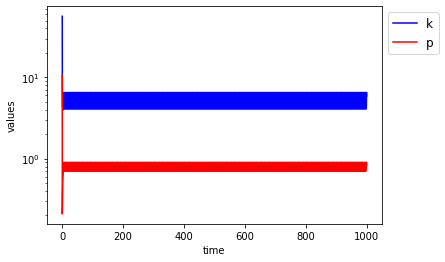

period = 4.301534571424213


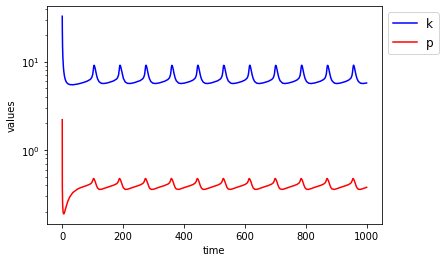

period = 84.59286112092207


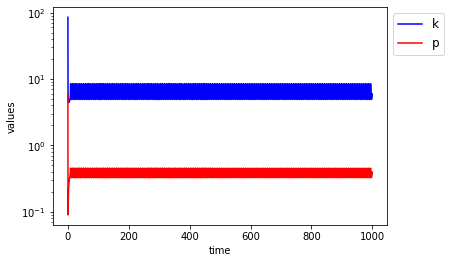

period = 6.04750940529334


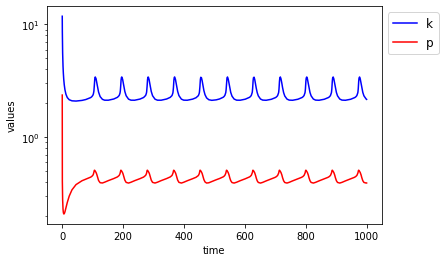

period = 86.78598104930666


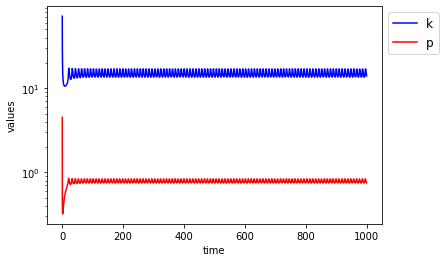

period = 9.547763772604867


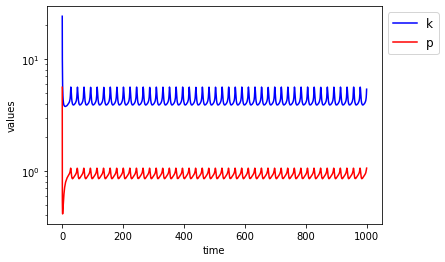

period = 23.268394247114543


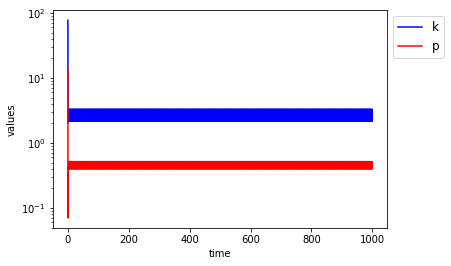

period = 3.101386487429636


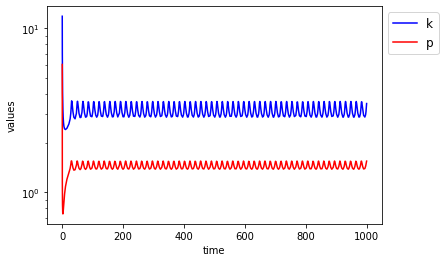

period = 17.530200938475446


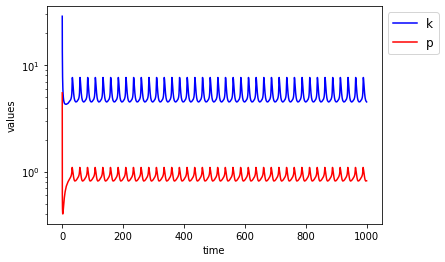

period = 25.14316912720767


In [21]:
for params in osc_params:
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    tmax = 1000 #maximum time we'll integrate to
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)

    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
    print('period = ' + str(period))